In [122]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster

# import os
# import pickle
# from tqdm import tqdm
# import scipy.signal
# import csv      
# import numpy.random as nprd
# import numpy.linalg as npla

In [123]:
# Create matrix from csv file containing anomaly data

def creatematrix(filename):
    matrix = np.genfromtxt(filename, delimiter=',', skip_header=1)
    return matrix

(-83.928, -83.926)

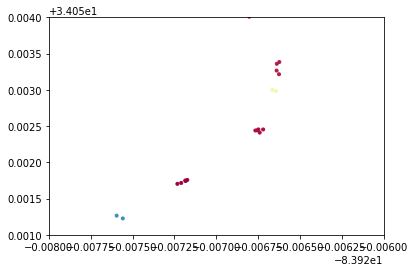

In [124]:
# Sample scatterplot of anomalies by location

mtx = creatematrix("output.csv")
# print(mtx)
x = mtx[:,1]  # longitudes in 2nd col of matrix
y = mtx[:,0]  # latitudes in 1st col
plt.scatter(x, y, marker='.', c=labels, cmap="Spectral")
plt.ylim((34.051, 34.054))
plt.xlim((-83.928, -83.926))

In [125]:
# Perform spatial clustering and get cluster labels for each anomaly

dbscan = sklearn.cluster.DBSCAN(eps=0.0002, min_samples=1)
labels = dbscan.fit_predict(mtx[:,:1])
print(len(labels))   # Number of anomalies
print(labels[:50])   # Labels for first 50 anomalies

187
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 11 14 13 15 16 17 18 19 17 20
 21 22 22 15 15 11 14 10  9 23  0  1  2  4  6  8  9 10 11 12 14 13 13 15
 22 20]


In [129]:
sizes = []
cluster_count = labels.max()   # Number of clusters minus 1
print("Number of clusters: ", cluster_count+1, "\n")
for i in range(cluster_count):
    indices = np.where(labels==i)[0]   # Indices of anomalies with same label (in same cluster)
    cluster_size = len(indices)   # Count indices to get cluster size
    print(cluster_size)
    sizes.append(cluster_size)  
    
    # Check
#     if i==15:
#         print(np.where(labels==i))
#         print(indices)   
#         print(len(indices))
sizes = np.array(sizes)
avg = sizes.mean()
print("\nAverage cluster size: ", avg)

Number of clusters:  45 

5
5
4
4
3
2
4
1
7
10
8
16
6
10
6
12
3
7
5
9
7
2
8
5
2
4
2
2
1
3
2
1
3
2
2
2
2
1
1
2
1
2
1
1

Average cluster size:  4.2272727272727275


In [130]:
# Separating by heading

same_side = []
other_side = []
for c in range(cluster_count):
    indices = np.where(labels==c)[0]
    cluster_size = len(indices)
    anom1 = indices[0]   # First anomaly in cluster
    heading = mtx[anom1][2]
    same_side.append(mtx[anom1])
    
    # Check
#     check = 2
#     if c==check:
#         print("CONTROL\nIndex: ", anom1)
#         print("Degree: ", heading, "\n")
        
    for a in range(cluster_size):
        if a==0:
            continue  # First anomaly is used for comparison
        else:
            anom2 = indices[a]
            heading2 = mtx[anom2][2]
            diff = abs(heading-heading2)
            if diff>90 and diff<270:
                other_side.append(mtx[anom2])
#                 if c==check:
#                     print("Other side!")
            else:
                same_side.append(mtx[anom2])
#                 if c==check:
#                     print("Same side")
                    
            # Check
#             if c==check:
#                 print("Index: ", anom2)
#                 print("Degree: ", heading2)
#                 print("Diff: ", diff, "\n")

same_side = np.array(same_side)
other_side = np.array(other_side)

In [131]:
# Perform spatial clustering on both matrices and recalculate average cluster size

dbscan = sklearn.cluster.DBSCAN(eps=0.0002, min_samples=1)

# Same side
same_labels = dbscan.fit_predict(same_side[:,:1])
print("Number of anomalies on same side: ", len(same_labels))
same_sizes = []
same_cluster_count = same_labels.max()
print("Number of clusters (same): ", same_cluster_count)
for i in range(same_cluster_count):
    indices = np.where(same_labels==i)[0]
    cluster_size = len(indices)
    print(cluster_size)
    same_sizes.append(cluster_size)   
same_sizes = np.array(same_sizes)
same_avg = same_sizes.mean()
print("Average cluster size (same): ", same_avg, "\n")

# Other side
other_labels = dbscan.fit_predict(other_side[:,:1])
print("Number of anomalies on other side: ", len(other_labels))
other_sizes = []
other_cluster_count = other_labels.max()
print("Number of clusters (other): ", other_cluster_count)
for i in range(other_cluster_count):
    indices = np.where(other_labels==i)[0]
    cluster_size = len(indices)
    print(cluster_size)
    other_sizes.append(cluster_size)   
other_sizes = np.array(other_sizes)
other_avg = other_sizes.mean()
print("Average cluster size (other): ", other_avg, "\n")

# New average
avgs = np.array([same_avg, other_avg])
new_avg = avgs.mean()
print("New average: ", new_avg)

Number of anomalies on same side:  133
Number of clusters (same):  45
5
5
4
4
3
2
4
1
5
3
2
3
8
5
9
3
4
1
2
3
5
5
3
2
7
5
2
3
1
2
1
1
2
1
2
1
2
1
2
1
1
2
1
2
1
Average cluster size (same):  2.933333333333333 

Number of anomalies on other side:  53
Number of clusters (other):  19
1
1
5
5
8
1
1
3
7
1
4
4
4
1
1
1
2
1
1
Average cluster size (other):  2.736842105263158 

New average:  2.8350877192982455
